In [119]:
# ======== imports modules ========

# data table manip
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [120]:
# ======== clean csv files ========

# indicators csv (drops blank first row, gets rid of dt indicator columns, sets index to datetime)
indicators = pd.read_csv('Indicators_train.csv').iloc[1:].dropna(how='all')
indicators.date = pd.to_datetime(indicators.date)
for column in indicators:
    if 'dt' in column:
        del indicators[column]
    elif 'date' in column:
        continue
    else:
        indicators[column] = indicators[column].astype(float)
indicators = indicators.set_index(indicators.date)
del indicators['date']

# stock - csv (sets index to datetime)
stock = pd.read_csv('stocks-us-adjClose.csv')
stock.date = pd.to_datetime(stock.date)
stock = stock.set_index(stock.date)
del stock['date']

# sector - csv (loads csv and prints sectors for reference)
sector = pd.read_csv('Company_information.csv', encoding = "ISO-8859-1")
seclist = sector.Sector.unique()
sectorset = []
for member in seclist:
    if str(member) != 'nan':
        sectorset.append(member)

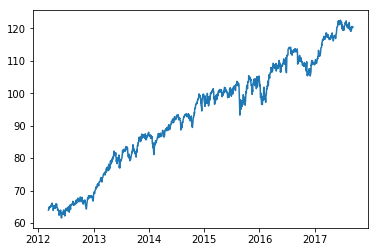

In [121]:
# ======== merge sector and indicators for single dataframe ========

# main sectors - csv
mainsectors = pd.read_csv('sector_ETFs.csv')
mainsectors['Date'] = pd.to_datetime(mainsectors['Date'])
mainsectors = mainsectors.set_index(mainsectors['Date'])
del mainsectors['Date']

# Merge sectors with indicators
sec_indic = pd.merge(mainsectors,indicators, how='inner', left_index=True, right_index=True).dropna(how='any')

# data appears linear and not logarithmic
plt.plot(sec_indic['Consumer Goods (IYK)'])
plt.show()

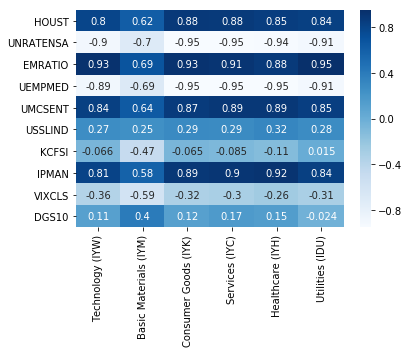

In [122]:
# ======== checks correllations between ticker sectors and macro economic indicators ========

sectors=['Technology (IYW)', 'Basic Materials (IYM)', 'Consumer Goods (IYK)', 'Services (IYC)', 'Healthcare (IYH)', 'Utilities (IDU)']
features=['HOUST', 'UNRATENSA', 'EMRATIO', 'UEMPMED',
       'UMCSENT', 'USSLIND', 'KCFSI', 'IPMAN', 'VIXCLS', 'DGS10']
sec_indic.corr()

# initiate empty dataframe
corr = pd.DataFrame()
for a in features:
    for b in sectors:
        corr.loc[a, b] = sec_indic.corr().loc[a, b]

corr

sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

# Correlations: Dark blue indicates strong correlation, White indicates strong inverse correlation

In [139]:
# ======== runs linear regression analysis ========
def linreg_analysis(sec, ind, trainstart, trainstop, teststart,teststop):
    # choose variables
    collist = [sec,ind]
    xylist = ['x','y']

    # Assigning Test and Training Data ranges
    train_data = sec_indic[trainstart:trainstop][collist]
    train_data.columns = xylist

    test_data = sec_indic[teststart:teststop][collist]
    test_data.columns = xylist

    #Prints the Shape of a DataFrames after droping
    print(test_data.shape)
    print(train_data.shape)

    #Creation of Linear Model Object
    lm = LinearRegression()

    #Slicing of Datasets
    x_train = pd.DataFrame(train_data.iloc[:,0].values)
    y_train = pd.DataFrame(train_data.iloc[:,1].values)

    x_test = pd.DataFrame(test_data.iloc[:,0].values)
    y_test = pd.DataFrame(test_data.iloc[:,1].values)

    #Training the Model by training dataset
    lm.fit(x_train,y_train)

    #Prints the Accuracy of Model
    accuracy = round(lm.score(x_train,y_train) *100,2)
    print('Accuracy:', accuracy)

    #Prints the Coefficients
    print('Coefficients', lm.coef_)

    #Estimated prediction of y_test values based on trained model
    test_data['y_predict'] = lm.predict(x_test)
    
    #graphs test data and predicted data
    lines = ['y', 'y_predict']

    plt.plot(test_data[lines])
    plt.show()

(72, 2)
(1344, 2)
Accuracy: 89.03
Coefficients [[ 0.02820515]]


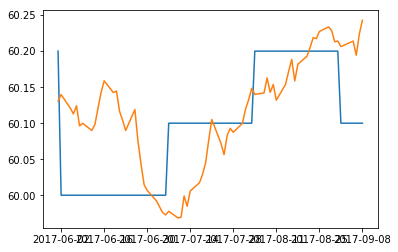

In [140]:
linreg_analysis('Utilities (IDU)','EMRATIO','2010','2017-05-29','2017-06-01','2018-12-30')